Cả SARSA và Q-learning đều là thuật toán học tăng cường không giám sát sử dụng để tìm ra chính sách tối ưu cho một tác vụ trong môi trường. Tuy nhiên, chúng có một số điểm khác nhau:

1.SARSA và Q-learning đều thu được chính sách tối ưu nhưng Q-learning tìm cách tối đa hóa giá trị trạng thái hành động trung bình với hành động tốt nhất (Q), trong khi SARSA tìm cách cải thiện giá trị trạng thái hành động tiếp theo với hành động chọn được (SARSA).

2.SARSA thi hành tác vụ trực tiếp trong sổ hành động của chính sách, trong khi Q-learning thi hành tác vụ bằng cách lấy hợp lệ tốt nhất trong sổ hành động.

3.SARSA được coi là ổn định hơn khi môi trường thay đổi, trong khi Q-learning có thể được sử dụng hiệu quả hơn trong các nhiệm vụ cực đại hơn.

In [1]:
import gym
import numpy as np
import random
import time

In [2]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [5]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [6]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [7]:
q_table

array([[0.54582075, 0.49512372, 0.50672801, 0.50089542],
       [0.24638752, 0.26173479, 0.27141131, 0.49291877],
       [0.41344741, 0.42239291, 0.39815216, 0.44423888],
       [0.22728998, 0.25846041, 0.29181958, 0.42945001],
       [0.56281077, 0.45508241, 0.3280732 , 0.38147291],
       [0.        , 0.        , 0.        , 0.        ],
       [0.39276781, 0.1880198 , 0.14806185, 0.10062639],
       [0.        , 0.        , 0.        , 0.        ],
       [0.46000997, 0.40067879, 0.40382903, 0.58901963],
       [0.47652549, 0.67135692, 0.4377205 , 0.33206873],
       [0.64326159, 0.45641613, 0.37742387, 0.37716799],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.46646017, 0.52428652, 0.76745183, 0.54806363],
       [0.75278385, 0.94906454, 0.74709101, 0.73703602],
       [0.        , 0.        , 0.        , 0.        ]])

In [8]:
sum(rewards_all)

13132.0

In [9]:
sum(rewards_all[0:1000])

333.0

In [10]:
sum(rewards_all[1000:2000])

586.0

In [11]:
sum(rewards_all[2000:3000])

656.0

In [12]:
sum(rewards_all[9000:10000])

667.0

In [13]:
sum(rewards_all[19000:20000])

677.0

In [14]:
#@title Install package
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1

In [15]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [16]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(720, 480))
display.start()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [17]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.5)

        state = next_state

    return (total_reward, steps)

In [18]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [19]:
play_multiple_times(env, q_table, 1000)

Number of successes: 758/1000
Average number of steps: 36.80870712401055


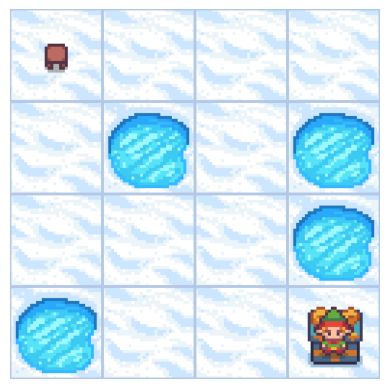

(1.0, 37)

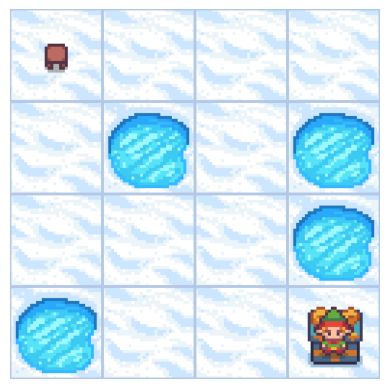

In [20]:
play(env, q_table, render=True)

In [21]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [22]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

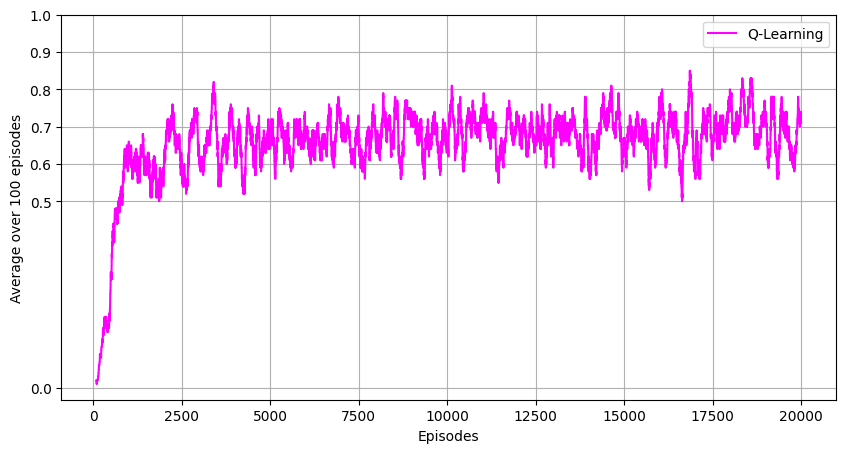

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

In [24]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()
        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):
            next_state, reward, done, info = env.step(action)

            exploration_next = random.uniform(0,1)
            if exploration_next < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if done:
                break

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')

    return q_table, rewards_all


In [25]:
sarsa_table, rewards_all_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [26]:
sarsa_table

array([[0.56956388, 0.47874497, 0.46204567, 0.45957413],
       [0.25080023, 0.28837118, 0.23220191, 0.47351296],
       [0.37898203, 0.18672645, 0.16675466, 0.1822189 ],
       [0.00091237, 0.11676099, 0.00115043, 0.01617686],
       [0.58954498, 0.38602978, 0.39814657, 0.34668149],
       [0.        , 0.        , 0.        , 0.        ],
       [0.10480751, 0.04869454, 0.3280869 , 0.12990191],
       [0.        , 0.        , 0.        , 0.        ],
       [0.31337498, 0.39300075, 0.40087561, 0.61929488],
       [0.43724829, 0.67769932, 0.40961775, 0.37224254],
       [0.63034761, 0.34950482, 0.32727522, 0.2991265 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.51447965, 0.46406704, 0.816868  , 0.54208297],
       [0.71193353, 0.9014995 , 0.7182943 , 0.71441004],
       [0.        , 0.        , 0.        , 0.        ]])

In [27]:
sum(rewards_all_sarsa[0:1000])

244.0

In [28]:
play_multiple_times(env, sarsa_table, 1000)

Number of successes: 735/1000
Average number of steps: 38.02448979591837


In [29]:
window = 100
average_y1 = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y1.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [30]:
for ind in range(window - 1):
    average_y1.insert(0, np.nan)

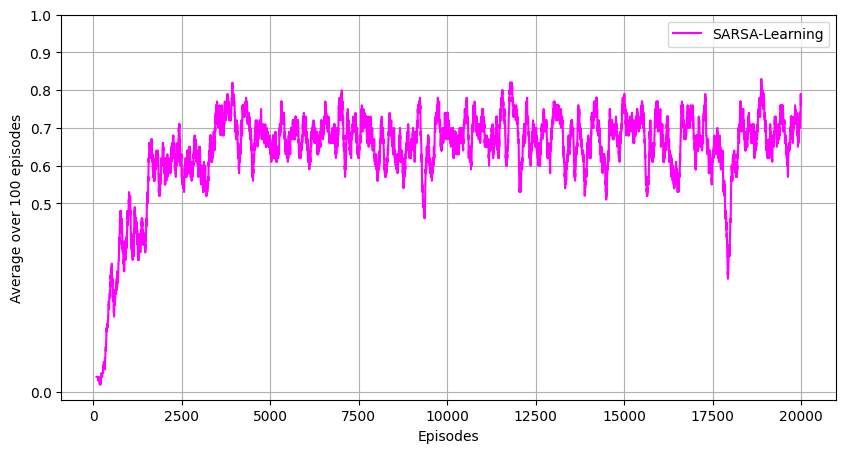

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_sarsa)), average_y1, color='magenta', label='SARSA-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

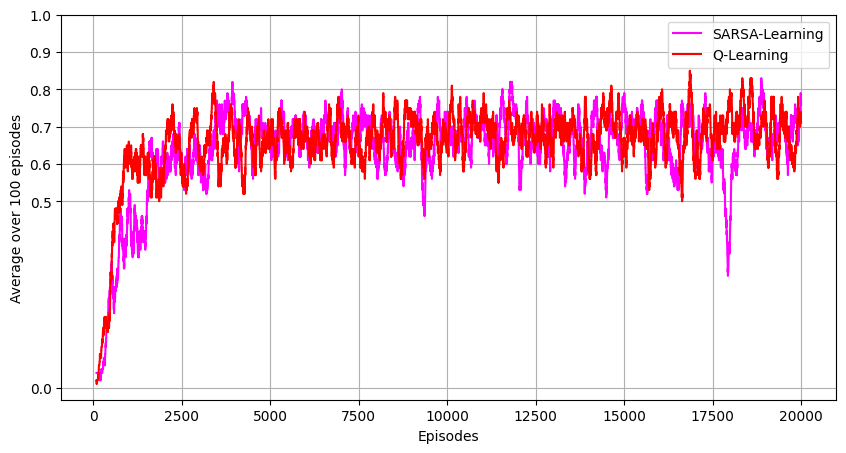

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_sarsa)), average_y1, color='magenta', label='SARSA-Learning')
plt.plot(np.arange(len(rewards_all)), average_y, color='red', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()